### Algoritmo Strassen; implementación y comparaciones.
#### Rodrigo Hermosilla Puebla - 95.74.144-4

>Carga de librerías básicas

In [1]:
import random #utilizada para obtener muestras random de matrices
import time #utilizado para medir tiempo de ejecución
import pandas as pd #utilizado para almacenar el resultado de las pruebas
import math #utilizado para calcular log_2
import matplotlib.pyplot as plt #utilizado para gráficar

> 1. Funciones y algoritmos utilizados durante el ejercicio.

In [2]:
#Genera una matriz vacía de tamaño size=(m,n)
def emptyMatrix(size):
    rows, cols = size
    C = [[0 for i in range(cols)] for j in range(rows)]
    return C

In [3]:
#Genera una matriz con numeros random entre 1 y 100, de tamaño (m,n)
def randomMatrix(size):
    rows, cols = size
    C = [[random.randint(1, 100) for i in range(cols)] for j in range(rows)]
    return C

In [4]:
#Suma de dos matrices de tamaño size=(m,n)
def add(A, B, size):
    C = emptyMatrix(size)
    rows, cols = size
    for i in range(rows):
        for j in range(cols):
            C[i][j] = A[i][j] + B[i][j]
    return C

In [5]:
#Resta de dos matrices de tamaño size=(m,n)
def sub(A, B, size):
    C = emptyMatrix(size)
    rows, cols = size
    for i in range(rows):
        for j in range(cols):
            C[i][j] = A[i][j] - B[i][j]
    return C

In [6]:
#Mezcla de las submatrices c11, c12, c21 y c22 en una matriz de forma [[c11, c12], [c21, c22]]
def merge(c11, c12, c21, c22, size):
    C = emptyMatrix(size)
    rows, cols = size
    half_rows = rows // 2
    half_cols = cols // 2
    for row in range(0, half_rows):
        for col in range(0, half_cols):
            C[row][col] = c11[row][col]
            C[row][col + half_rows] = c12[row][col]
            C[row + half_rows][col] = c21[row][col]
            C[row + half_rows][col + half_cols] = c22[row][col]
    return C

In [7]:
#Obtención de una submatriz de la matriz M, con coordenadas (ro=fila superior, 
#c0=columna izquierda, r1=fila inferior, c1=columna derecha)
def submatrix(M, r0, c0, r1, c1):
    z = emptyMatrix((r1 - r0, c1 - c0))
    i_ = 0
    for i in range(r0, r1):  # rows
        j_ = 0
        for j in range(c0, c1):  # cols
            z[i_][j_] = M[i][j]
            j_ += 1
        i_ += 1
    return z

In [8]:
#division de una matriz de tamaño size=(m,n) en cuatro submatrices de tamaño (m/2,n/2)
def split(A, size):
    rows, cols = size
    half_rows = rows // 2
    half_cols = cols // 2
    a = submatrix(A, 0, 0, half_rows, half_cols)
    b = submatrix(A, 0, half_cols, half_rows, cols)
    c = submatrix(A, half_rows, 0, rows, half_cols)
    d = submatrix(A, half_rows, half_cols, rows, cols)
    return a, b, c, d

In [9]:
#Algoritmo de calculo para la multiplicacion de matrices, para dos matrices A y B.
def matmul(A, B, sizeA, sizeB):
    rowsA, colsA = sizeA
    rowsB, colsB = sizeB
    C = emptyMatrix((rowsA, colsB))
    for i in range(rowsA):
        for j in range(colsB):
            for k in range(rowsB):
                C[i][j] += A[i][k] * B[k][j]
    return C

In [10]:
#Algoritmo de Strassen para la multiplicación de dos matrices de tamaño (n, n)
def strassen(A, B, size):
    rows, cols = size
    if rows <= 32:
        C = matmul(A, B, size, size)
        return C
    else:
        a, b, c, d = split(A, size)
        e, f, g, h = split(B, size)

        new_size = (rows // 2, cols // 2)

        p1 = strassen(a, sub(f, h, new_size), new_size)  # a*(f-h)
        p2 = strassen(add(a, b, new_size), h, new_size)  # (a+b)*h
        p3 = strassen(add(c, d, new_size), e, new_size)  # (c+d)*e
        p4 = strassen(d, sub(g, e, new_size), new_size)  # d*(g-e)
        p5 = strassen(add(a, d, new_size), add(e, h, new_size),
                      new_size)  # (a+d)*(e+h)
        p6 = strassen(sub(b, d, new_size), add(g, h, new_size),
                      new_size)  # (b-d)*(g+h)
        p7 = strassen(sub(a, c, new_size), add(e, f, new_size),
                      new_size)  # (a-c)*(e+h)
        # c11 = p5 + p4 - p2 + p6
        c11 = add(sub(add(p5, p4, new_size), p2, new_size), p6, new_size)
        # c12 = p1 + p2
        c12 = add(p1, p2, new_size)
        # c21 = p3 + p4
        c21 = add(p3, p4, new_size)
        # c22 = p1 + p5 - p3 - p7
        c22 = sub(sub(add(p1, p5, new_size), p3, new_size), p7, new_size)

        C = merge(c11, c12, c21, c22, size)

        return C

> 2. Análisis de métricas para la ejecución del algoritmo de Strassen vs el algoritmo Tradicional de multiplicación de matrices de tamaño [n x n] x [n x n].

In [24]:
stat = pd.DataFrame(columns=['id','algo','n','k','elapsed_time'])
j = 0
for m in range(1, 10):
    i=2**m
    print('-'*60)
    A = randomMatrix((i, i))
    B = randomMatrix((i, i))
    start_time = time.time()
    C_1 = matmul(A, B, (i, i), (i, i))
    elapsed_time_c1 = time.time() - start_time
    stat.loc[j]=[i, 'Standard', i, 1, elapsed_time_c1]
    j += 1
    print('Tiempo para n={} (Standard): {}'.format(i, elapsed_time_c1))
    size = i
    start_time = time.time()
    C_2 = strassen(A, B, (size, size))
    elapsed_time_c2 = time.time() - start_time
    stat.loc[j]=[i, 'Strassen', i, 1, elapsed_time_c2]
    j += 1
    print('Tiempo para n={} (Strassen): {}'.format(i, elapsed_time_c2))
stat.to_csv('data1.csv')

------------------------------------------------------------
Tiempo para n=2 (Standard): 0.00423431396484375
Tiempo para n=2 (Strassen): 0.006459951400756836
------------------------------------------------------------
Tiempo para n=4 (Standard): 3.266334533691406e-05
Tiempo para n=4 (Strassen): 3.409385681152344e-05
------------------------------------------------------------
Tiempo para n=8 (Standard): 0.0001430511474609375
Tiempo para n=8 (Strassen): 0.00015282630920410156
------------------------------------------------------------
Tiempo para n=16 (Standard): 0.0011661052703857422
Tiempo para n=16 (Strassen): 0.0011169910430908203
------------------------------------------------------------
Tiempo para n=32 (Standard): 0.008990049362182617
Tiempo para n=32 (Strassen): 0.008089780807495117
------------------------------------------------------------
Tiempo para n=64 (Standard): 0.06644034385681152
Tiempo para n=64 (Strassen): 0.06151700019836426
------------------------------------

In [30]:
stat

,id,algo,n,k,elapsed_time
0,2,Standard,2,1,0.004234
1,2,Strassen,2,1,0.006460
2,4,Standard,4,1,0.000033
3,4,Strassen,4,1,0.000034
4,8,Standard,8,1,0.000143
5,8,Strassen,8,1,0.000153
6,16,Standard,16,1,0.001166
7,16,Strassen,16,1,0.001117
8,32,Standard,32,1,0.008990
9,32,Strassen,32,1,0.008090


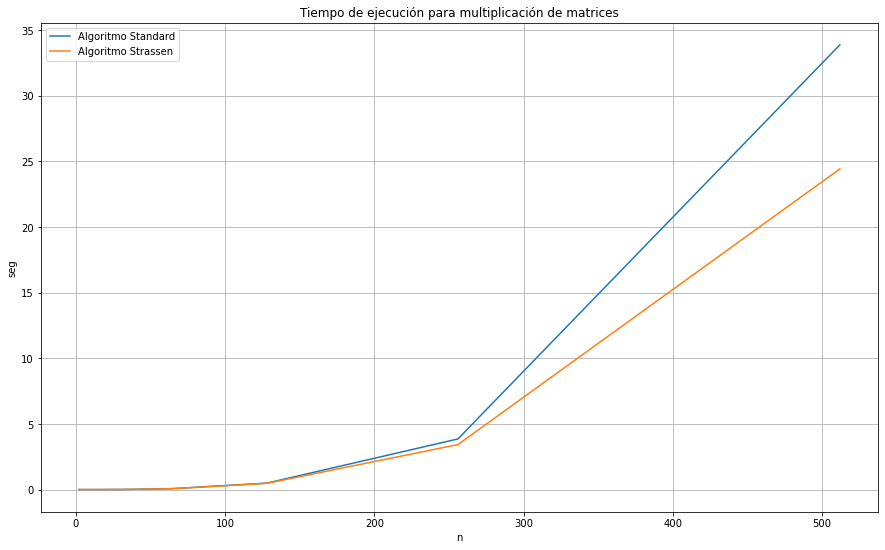

In [31]:
plt.figure(figsize=(15,9))
plt.title('Tiempo de ejecución para multiplicación de matrices')
plt.xlabel('n')
plt.ylabel('seg')
plt.grid()
stat_sta=stat[stat['algo']=='Standard']
stat_str=stat[stat['algo']=='Strassen']
plt.plot(stat_sta['id'],stat_sta['elapsed_time'],label='Algoritmo Standard')
plt.plot(stat_str['id'],stat_str['elapsed_time'],label='Algoritmo Strassen')
plt.legend()
plt.show()

> 3. Implementación de multiplicación de matrices rectangulares a través de la técnica de padding.

In [32]:
#Expande la matriz a una forma (z,z) donde z es el mayor valor en potencia de 2, del lado mayor de la matriz.
def expand(A, size):
    rowsA, colsA=size
    if rowsA<colsA:
        max_side=colsA
    else:
        max_side=rowsA
    pow2 = math.log(max_side, 2)
    if pow2.is_integer():
        n = max_side
        if rowsA==colsA:
            return A,n
    else:
        n=2**math.ceil(pow2)
    for row in range(rowsA,n):
        new_row=[]
        for col in range(0,colsA):
            new_row+=[0]
        A.append(new_row)
    for col in range(colsA,n):
        for row in range(0,n):
            A[row]+=[0]
    return A,n

In [34]:
#Multiplicación de matrices del tipo [kn x n] x [n x kn] y [n x kn] x [kn x n] a través de padding.
def strassen_general(A, B, sizeA, sizeB):
    rowsA, colsA = sizeA
    rowsB, colsB = sizeB
    A,n=expand(A,sizeA)
    B,n=expand(B,sizeB)
    return strassen(A,B,(n,n)),n

> 4. Análisis de métricas del algoritmo de Strassen vs el algoritmo Tradicional de multiplicación de matrices de tamaño [kn x n] x [n x kn] y [n x kn] x [kn x n] para distintos valores de k.

In [ ]:
stat = pd.DataFrame(columns=['id','algo','n','k','elapsed_time'])
j = 0
for k in range(2,10):
    for m in range(1, 9):
        i=2**m
        print('-'*60)
        print('k:{}, n:{}'.format(k,i))
        sizeA=(k*i,i)
        sizeB=(i,i*k)
        A = randomMatrix(sizeA)
        B = randomMatrix(sizeB)
        start_time = time.time()
        C_1 = matmul(A, B, sizeA, sizeB)
        elapsed_time_c1 = time.time() - start_time
        stat.loc[j]=[i, 'Standard', i, k, elapsed_time_c1]
        j += 1
        print('Tiempo para ({}x{})(Standard): {}'.format(sizeA, sizeB, elapsed_time_c1))
        start_time = time.time()
        C_2,n = strassen_general(A, B, sizeA, sizeB)
        elapsed_time_c2 = time.time() - start_time
        stat.loc[j]=[i, 'Strassen', i, k, elapsed_time_c2]
        j += 1
        print('Tiempo para ({}x{})(Strassen): {}'.format((n,n), (n,n), elapsed_time_c2))
        print('-'*30)
        sizeA=(i,i*k)
        sizeB=(i*k,i)
        A = randomMatrix(sizeA)
        B = randomMatrix(sizeB)
        start_time = time.time()
        C_1 = matmul(A, B, sizeA, sizeB)
        elapsed_time_c1 = time.time() - start_time
        stat.loc[j]=[i, 'Standard', i, k, elapsed_time_c1]
        j += 1
        print('Tiempo para ({}x{})(Standard): {}'.format(sizeA, sizeB, elapsed_time_c1))
        start_time = time.time()
        C_2,n = strassen_general(A, B, sizeA, sizeB)
        elapsed_time_c2 = time.time() - start_time
        stat.loc[j]=[i, 'Strassen', i, k, elapsed_time_c2]
        j += 1
        print('Tiempo para ({}x{})(Strassen): {}'.format((n,n), (n,n), elapsed_time_c2))
    stat.to_csv('data2k.csv')

------------------------------------------------------------
k:2, n:2
Tiempo para ((4, 2)x(2, 4))(Standard): 0.022485017776489258
Tiempo para ((4, 4)x(4, 4))(Strassen): 0.006836891174316406
------------------------------
Tiempo para ((2, 4)x(4, 2))(Standard): 1.2874603271484375e-05
Tiempo para ((4, 4)x(4, 4))(Strassen): 5.698204040527344e-05
------------------------------------------------------------
k:2, n:4
Tiempo para ((8, 4)x(4, 8))(Standard): 8.916854858398438e-05
Tiempo para ((8, 8)x(8, 8))(Strassen): 0.00021505355834960938
------------------------------
Tiempo para ((4, 8)x(8, 4))(Standard): 4.363059997558594e-05
Tiempo para ((8, 8)x(8, 8))(Strassen): 0.00017690658569335938
------------------------------------------------------------
k:2, n:8
Tiempo para ((16, 8)x(8, 16))(Standard): 0.0005421638488769531
Tiempo para ((16, 16)x(16, 16))(Strassen): 0.0011010169982910156
------------------------------
Tiempo para ((8, 16)x(16, 8))(Standard): 0.00025391578674316406
Tiempo para ((16

In [41]:
stat

,id,algo,n,k,elapsed_time
0,2,Standard,2,1,0.000012
1,2,Strassen,2,1,0.005857
2,2,Standard,2,1,0.000011
3,2,Strassen,2,1,0.000052
4,4,Standard,4,1,0.000029
...,...,...,...,...,...
211,32,Strassen,32,9,22.660938
212,64,Standard,64,9,5.183166
213,64,Strassen,64,9,162.500480
214,64,Standard,64,9,0.557286


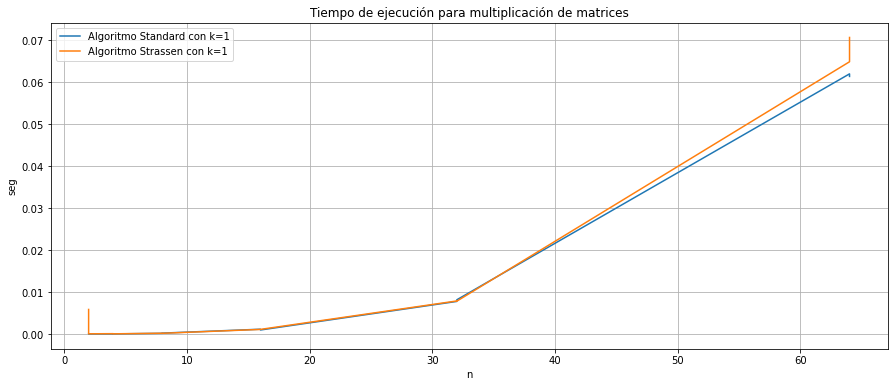

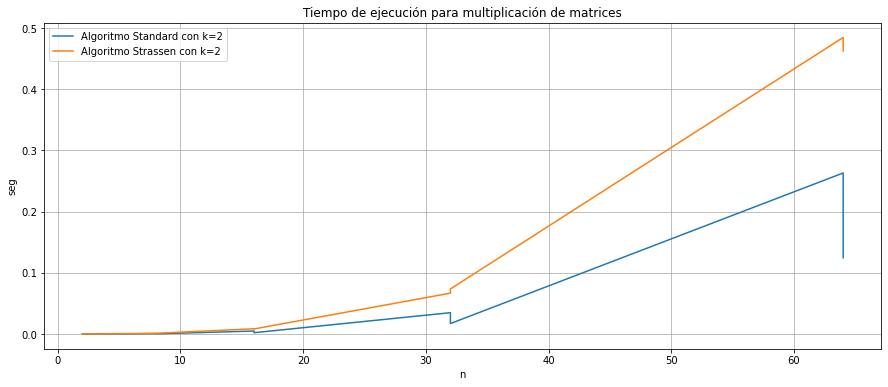

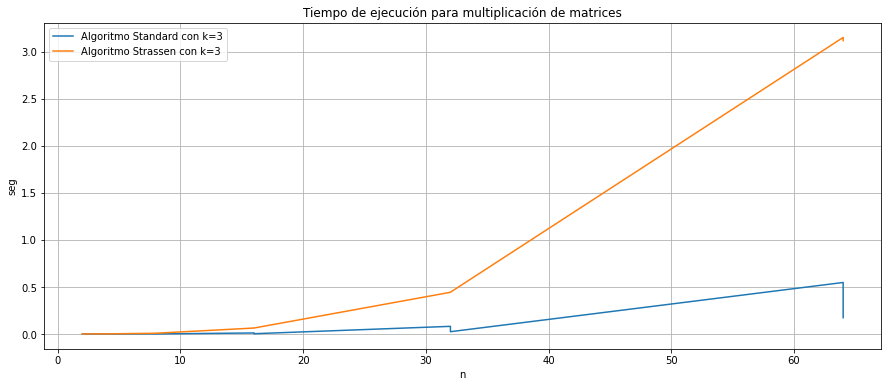

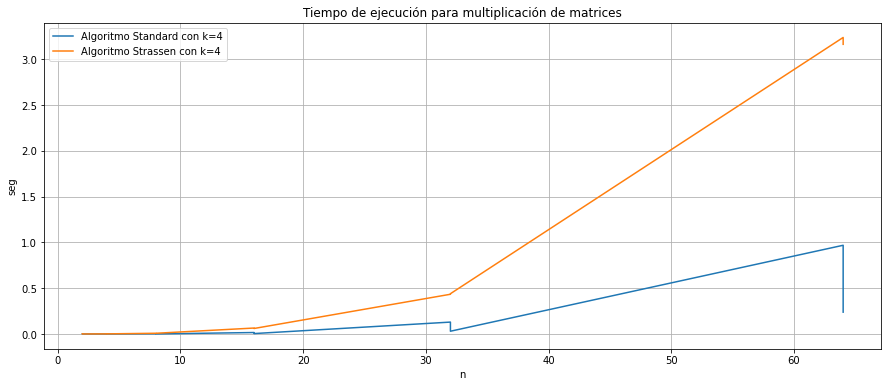

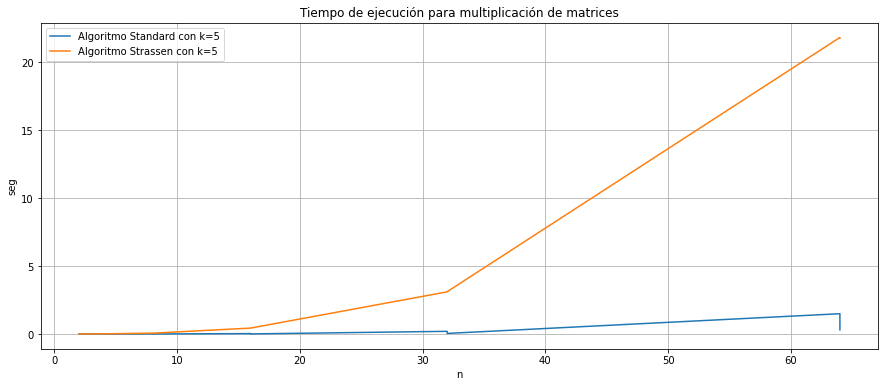

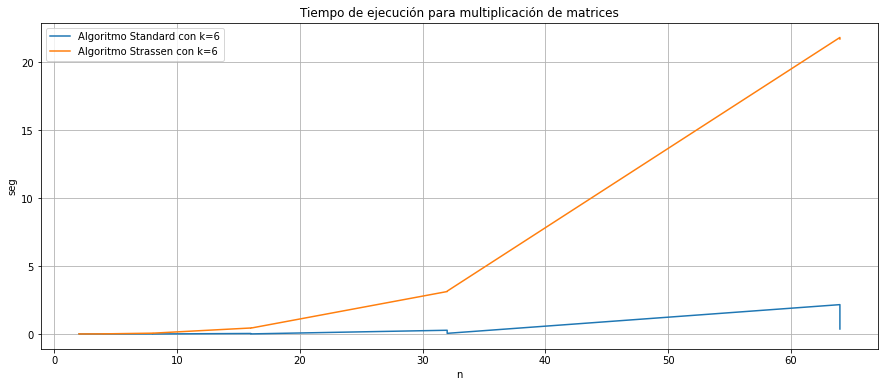

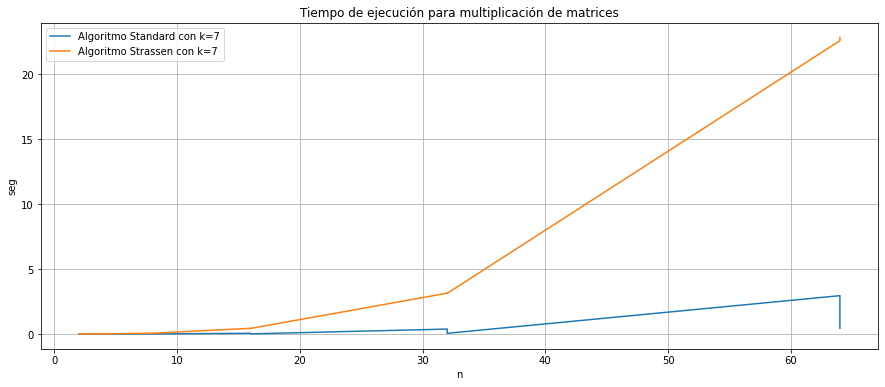

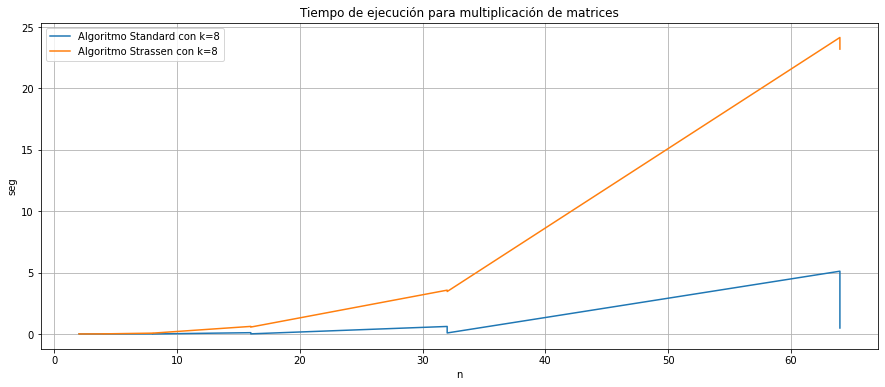

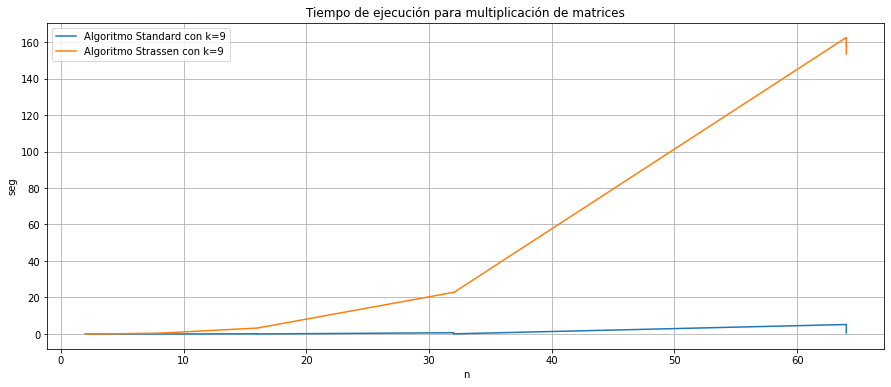

In [40]:
for k in range(1, 10):
    plt.figure(figsize=(15,6))
    plt.title('Tiempo de ejecución para multiplicación de matrices')
    plt.xlabel('n')
    plt.ylabel('seg')
    plt.grid()
    stat_=stat[stat['k']==k]
    stat_sta=stat_[stat_['algo']=='Standard']
    stat_str=stat_[stat_['algo']=='Strassen']
    plt.plot(stat_sta['id'],stat_sta['elapsed_time'],label='Algoritmo Standard con k={}'.format(k))
    plt.plot(stat_str['id'],stat_str['elapsed_time'],label='Algoritmo Strassen con k={}'.format(k))
    plt.legend()